In [3]:
import pandas as pd
import numpy as np
from scipy.stats import levy_stable as l
import matplotlib.pyplot as plt

df = pd.read_csv('Data Jarak JKT.csv',sep=';')
parameter = pd.read_csv('parameterTSP.csv',sep=';')
del df['A']
print(df,'\n\n',parameter)


   JKT  BDG  CRB  YGY  SMRG  SRKT  SBY  MLG
0    0  270  327    0     0     0    0    0
1  270    0  120  373     0     0    0    0
2  327  120    0  210   305     0    0    0
3    0  373  210    0   109    60    0    0
4    0    0  305  109     0    97  369    0
5    0    0    0   60    97     0    0  370
6    0    0    0    0   369     0    0   94
7    0    0    0    0     0   370   94    0 

    n_Individu  n_kota  a   b  generasi  alpha          lb
0         100       8  1  10         0      1  [1.8,-0.5]
1          50       8  1  10         0      1  [1.8,-0.5]
2          30       8  1  10         0      1  [1.8,-0.5]
3          20       8  1  10         0      1  [1.8,-0.5]
4          10       8  1  10         0      1  [1.8,-0.5]
5          10       8  1  10         0      1  [1.8,-0.5]
6          10       8  1  10         0      1  [1.8,-0.5]


In [4]:
def calc_dist(X,kota):
    return sum( map( lambda x,y: kota[x,y] ,X  ,np.roll(X,1) ))

In [5]:
n_kota = len(df)
n_individu =  15
a = 2
b = 10

gen_individu = lambda n_individu, n_kota,a,b: np.random.uniform(a,b,(n_individu,n_kota))
cuckoos = gen_individu(n_individu,n_kota,a,b)
cuckoos

array([[9.03310666, 6.13519224, 4.32143723, 4.64863136, 6.95457654,
        9.56237463, 4.79250667, 8.71435867],
       [5.10403002, 2.45894508, 9.9441585 , 6.50191561, 3.28004579,
        9.51659401, 3.81195017, 5.61299447],
       [5.76011809, 4.56182127, 6.27715949, 2.65182543, 6.28436025,
        9.16605443, 6.16088065, 5.17150931],
       [3.12621302, 8.65547824, 2.26905864, 4.83741676, 3.34261599,
        4.96052217, 9.92281877, 8.75713449],
       [3.14546523, 7.47892964, 2.36242654, 9.67409029, 2.77675447,
        5.50186937, 8.3764023 , 2.98204387],
       [7.53490818, 5.61303637, 5.59788412, 7.05097953, 6.57507518,
        9.81541963, 3.3883474 , 4.73225488],
       [9.65207262, 2.07988426, 9.53067754, 4.46396252, 6.14498696,
        2.95436108, 9.40653514, 7.0578283 ],
       [4.95702679, 5.83836328, 7.202878  , 4.11115165, 8.28504912,
        8.55495301, 7.10238059, 3.53270404],
       [9.85381817, 8.30421518, 8.08855984, 6.81908801, 2.85815035,
        4.1449537 , 8.529648

In [6]:
def diskritisasi(cuckoos):
    return np.argsort(cuckoos)

In [7]:
def calculate_fitness(cuckoos,df):
    d_cuckoos = diskritisasi(cuckoos)
    fitness = np.array( list(map(lambda x: calc_dist( x ,df.values), d_cuckoos )) )
    fitness = fitness.reshape( (-1,1) )
    return np.concatenate( ( cuckoos ,fitness ) ,axis=1)

In [8]:
def sort_individu(cuckoos_with_f):
    return cuckoos_with_f[cuckoos_with_f[:,-1].argsort()]

In [9]:
cuckoos_w_f = sort_individu(calculate_fitness(cuckoos,df))

In [10]:
def solusi(cuckoos_w_f):
    
    df_kota = pd.DataFrame(diskritisasi(cuckoos_w_f[:,:-1]))
    cols = [ 'Urutan ' + str(i+1) for i in range( df_kota.shape[1]) ]
    df_kota.columns = cols
    df_kota['Jarak'] = cuckoos_w_f[:,-1].reshape(-1,1)
    return df_kota

In [11]:
parameter1 = solusi(cuckoos_w_f)
parameter1

,Urutan 1,Urutan 2,Urutan 3,Urutan 4,Urutan 5,Urutan 6,Urutan 7,Urutan 8,Jarak
0,2,3,6,1,4,7,0,5,210.0
1,6,7,2,1,4,3,0,5,323.0
2,6,0,3,7,4,2,1,5,425.0
3,2,4,7,0,5,1,6,3,515.0
4,1,4,6,0,7,3,5,2,549.0
5,5,7,3,2,6,1,4,0,580.0
6,2,0,4,3,5,1,7,6,590.0
7,4,7,5,3,2,1,6,0,760.0
8,7,0,5,6,1,3,4,2,787.0
9,3,1,7,0,6,2,4,5,835.0


In [12]:
def movement( X , p):

    levy = l.rvs( p['lb'][0] , p['lb'][1] , size=X.shape)
    return X + p['alpha'] * levy

In [13]:
def selec(new_cuckoos):

    pa = np.round( np.random.uniform(0,1) * (new_cuckoos.shape[0] -1) ).astype(int)
    sz = new_cuckoos[:-pa][:].shape
    new_cuckoos[:-pa,:] = np.random.uniform(a,b, size=(sz))
    return new_cuckoos

In [17]:
n_iter = 100
generasi = 0
n_kota = len(df)
n_individu = 100
p = { 'alpha': 1, 'lb':[1.8,-0.5] }
a = 1
b = 10
# Inisialisasi - Generasi Pertama
cuckoos = gen_individu(n_individu,n_kota,a,b)
cuckoos_w_f = sort_individu(calculate_fitness(cuckoos,df))
cuckoos = cuckoos_w_f[:,:-1]
new_cuckoos_w_f = np.copy(cuckoos_w_f)
new_cuckoos = np.copy(cuckoos)
# Main Program
while generasi<n_iter:
#bangkitkan cuckoo secara acak dengan levy flight
    new_cuckoos = movement(new_cuckoos,p)
#evaluasi fitness cuckoo
    new_cuckoos_w_f = sort_individu(calculate_fitness(new_cuckoos,df))
# seleksi
    new_cuckoos = selec(new_cuckoos)

#next generasi
    generasi = generasi+1

# Print Best
hasil = solusi(new_cuckoos_w_f)
hasil


,Urutan 1,Urutan 2,Urutan 3,Urutan 4,Urutan 5,Urutan 6,Urutan 7,Urutan 8,Jarak
0,3,0,6,5,2,7,1,4,109.0
1,0,5,6,2,7,1,4,3,109.0
2,7,3,4,0,5,1,6,2,109.0
3,5,0,3,4,1,7,2,6,109.0
4,1,2,5,6,3,4,0,7,229.0
...,...,...,...,...,...,...,...,...,...
95,7,6,4,5,0,2,1,3,1380.0
96,1,0,3,7,5,6,4,2,1434.0
97,2,1,0,4,6,7,5,3,1493.0
98,7,6,0,1,3,2,4,5,1719.0


In [19]:
hasil.iloc[0,:-1].astype(int)

Urutan 1    3
Urutan 2    0
Urutan 3    6
Urutan 4    5
Urutan 5    2
Urutan 6    7
Urutan 7    1
Urutan 8    4
Name: 0, dtype: int64

In [20]:
hasil1 = pd.DataFrame(hasil['Jarak'])
hasil1['Cuckoos'] = range(hasil.shape[0])

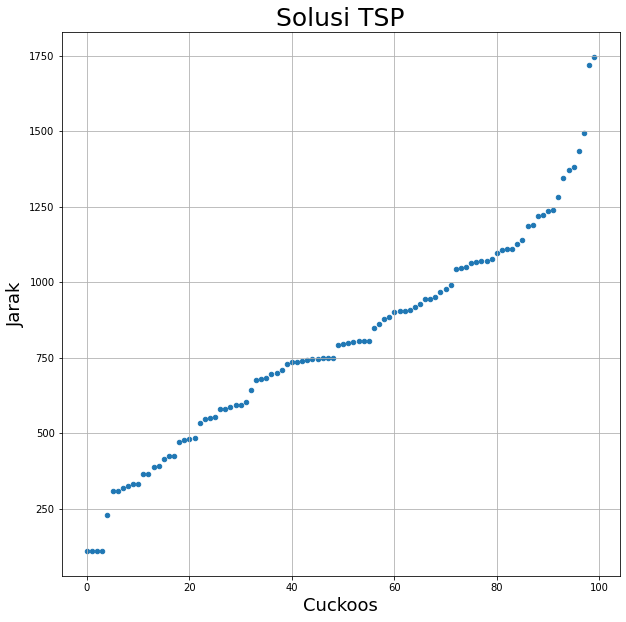

In [21]:
plt.figure(figsize=(10,10))
ax = plt.gca()
ax.set_title('Solusi TSP',fontsize=25)
ax.set_ylabel('Jarak(km)',fontsize=18)
ax.set_xlabel('Individu',fontsize=18)
hasil1.plot(ax=ax,kind='scatter',y='Jarak',x='Cuckoos')
ax.grid()

HASIL TERBAIK JARAK TERDEKAT NYA  ADALAH 109.0